In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV ,StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message='Specific Warning Message')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"
column_names = ['age', 'sex', 'chest_pain', 'rest_bp', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dataset = pd.read_csv(url, sep=' ', names=column_names)

In [5]:
dataset.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [6]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [7]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [8]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))
samples

[(array([[ 0.3922784 ,  0.6894997 ,  0.87092765, ..., -0.95423434,
           0.34987077,  1.18927733],
         [-0.37761378,  0.6894997 , -0.18355874, ..., -0.95423434,
           0.34987077,  1.18927733],
         [-1.03752137,  0.6894997 ,  0.87092765, ..., -0.95423434,
          -0.71153494, -0.87570581],
         ...,
         [ 0.1723092 , -1.45032695,  0.87092765, ...,  2.3070729 ,
           1.41127648,  1.18927733],
         [-1.14750596,  0.6894997 ,  0.87092765, ..., -0.95423434,
           0.34987077, -0.87570581],
         [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
           1.41127648, -0.87570581]]),
  array([[ 0.94220138,  0.6894997 , -2.29253153, ...,  2.3070729 ,
          -0.71153494,  0.67303154],
         [-0.92753677, -1.45032695, -0.18355874, ...,  2.3070729 ,
          -0.71153494, -0.87570581],
         [ 1.05218598, -1.45032695,  0.87092765, ...,  0.67641928,
           1.41127648, -0.87570581],
         ...,
         [-1.25749056,  0.6894997 

In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [10]:
def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

In [11]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.78 Best Kernel =  linear Best Nu =  8.12 Best Epsilon =  8.99
Best Accuracy =  0.79 Best Kernel =  poly Best Nu =  0.3 Best Epsilon =  8.77
Best Accuracy =  0.79 Best Kernel =  linear Best Nu =  2.56 Best Epsilon =  8.7
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  2.06 Best Epsilon =  0.17
Best Accuracy =  0.78 Best Kernel =  linear Best Nu =  7.69 Best Epsilon =  3.03
Best Accuracy =  0.83 Best Kernel =  linear Best Nu =  2.13 Best Epsilon =  8.18
Best Accuracy =  0.88 Best Kernel =  linear Best Nu =  0.03 Best Epsilon =  4.16
Best Accuracy =  0.83 Best Kernel =  sigmoid Best Nu =  5.04 Best Epsilon =  3.18
Best Accuracy =  0.78 Best Kernel =  linear Best Nu =  6.92 Best Epsilon =  6.22
Best Accuracy =  0.86 Best Kernel =  poly Best Nu =  6.06 Best Epsilon =  9.78


In [12]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.78,linear,8.12,8.99
1,2,0.79,poly,0.30,8.77
2,3,0.79,linear,2.56,8.70
3,4,0.79,rbf,2.06,0.17
4,5,0.78,linear,7.69,3.03
5,6,0.83,linear,2.13,8.18
6,7,0.88,linear,0.03,4.16
7,8,0.83,sigmoid,5.04,3.18
8,9,0.78,linear,6.92,6.22
9,10,0.86,poly,6.06,9.78


In [13]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [14]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [15]:
train_sizes

array([  1,   5,   8,  12,  15,  18,  22,  25,  29,  32,  36,  39,  42,
        46,  49,  53,  56,  60,  63,  66,  70,  73,  77,  80,  84,  87,
        91,  94,  97, 101, 104, 108, 111, 115, 118, 121, 125, 128, 132,
       135, 139, 142, 145, 149, 152, 156, 159, 163, 166, 170])

In [16]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

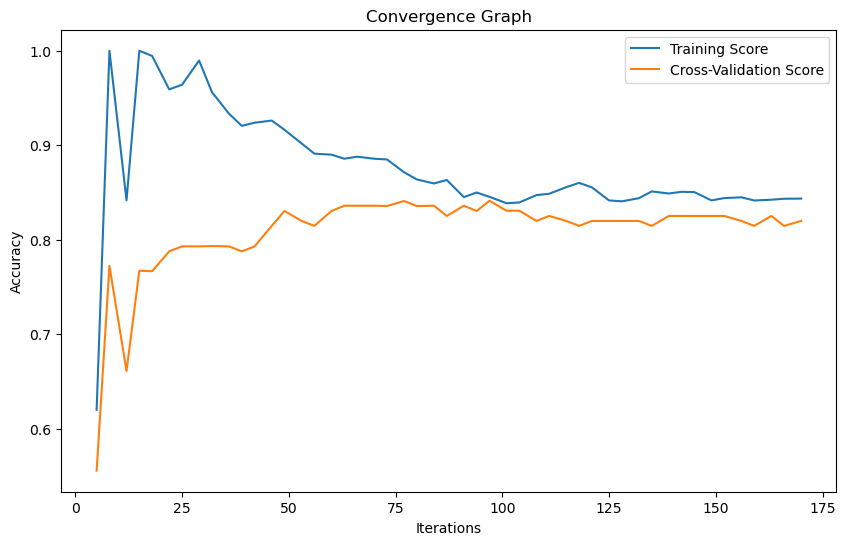

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()